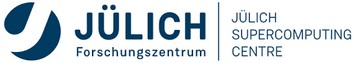
Author: [Jens Henrik Göbbert](mailto:j.goebbert@fz-juelich.de)
------------------------------------

# Supercomputing with JupyterLab - Tips & Tricks

This is the first time you are using JupyterLab on an HPC system? Let us show you some tips & tricks.

This notebook might be special to the environment at Juelich Supercomputing Centre, Forschungszentrum Juelich, Germany.

-------------------------

### Install your own JupyterLab from conda


### Prepare Conda Settings

Selectable **CONDA_TARGET_DIR** path for the central conda installation, should be in the project filesystem

In [1]:
export CONDA_TARGET_DIR=${PROJECT}/${USER}/miniconda3 ## ${HOME}/miniconda3
echo $CONDA_TARGET_DIR # double check

/p/project/coecschool22/goebbert1/miniconda3


Selectable **CONDA_ENV** name, will be used to specify the environment name
  - must be lowercase

In [2]:
CONDA_ENV=my_jupyterlab3

export CONDA_ENV=$(echo "${CONDA_ENV}" | awk '{print tolower($0)}')
echo ${CONDA_ENV} # double check

my_jupyterlab3


---
## 1. Download/Install Miniconda

Start here if you want to run the full installation.
If you want to create another environment in an existing conda setup go to **create environment**.  
If you want to attach yourself to an existing environment go to **create user kernel**.

* 1.1 - Download Minconda installer

In [3]:
wget --output-document=$HOME/Miniconda3.sh https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh

--2022-10-24 23:39:44--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-10-24 23:39:44--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘/p/project/ccstvs/goebbert1/home_juwels/Miniconda3.sh’

/p/project/ccstvs/g 100%[===================>]  73.06M  61.7MB/s    in 1.2s    

2022-10-24 23:39:45 (61.7 MB/s) - ‘/p

* 1.2 - Create target directory

In [4]:
mkdir -p ${CONDA_TARGET_DIR}
echo $CONDA_TARGET_DIR # double check

/p/project/coecschool22/goebbert1/miniconda3


* 1.3 - Install Miniconda

In [5]:
bash $HOME/Miniconda3.sh -b -u -p ${CONDA_TARGET_DIR}

PREFIX=/p/project/coecschool22/goebbert1/miniconda3
Unpacking payload ...
Solving environment: done

## Package Plan ##

  environment location: /p/project/coecschool22/goebbert1/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py39h7f8727e_0
    - conda==4.12.0=py39h06a4308_0
    - cryptography==36.0.0=py39h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.4=py39h06a4308_0
    - pyc

In [6]:
# verify that PYTHONPATH only points to directories of packages
# that are compatible with the Python interpreter in Miniconda3
echo $PYTHONPATH

/p/software/juwels/stages/2022/software/JupyterKernel-PyDeepLearning/1.1-gcccoremkl-11.2.0-2021.4.0-2022.3.4/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/JupyterKernel-Octave/6.4.0-gcccoremkl-11.2.0-2021.4.0-2022.3.4/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/JupyterKernel-Julia/1.7.1-gcccoremkl-11.2.0-2021.4.0-2022.3.4/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/JupyterKernel-Cling/0.9-gcccoremkl-11.2.0-2021.4.0-2022.3.4/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/JupyterKernel-Bash/0.7.2-gcccoremkl-11.2.0-2021.4.0-2022.3.4/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/JupyterProxy-XpraHTML5/0.3.4-gcccoremkl-11.2.0-2021.4.0-2022.3.4/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/Jupyter/2022.3.4-gcccoremkl-11.2.0-2021.4.0/lib/python3.9/site-packages:/p/software/juwels/stages/2022/software/Shapely/1.8.0-GCCcore-11.2.0/lib/python3.9/site-packages:/p/

In [7]:
# for now we unset the PYTHONPATH
# if you want to use modules with conda, you might need to think about this step again
unset PYTHONPATH
echo $PYTHONPATH

In [8]:
${CONDA_TARGET_DIR}/bin/conda init bash

no change     /p/project/coecschool22/goebbert1/miniconda3/condabin/conda
no change     /p/project/coecschool22/goebbert1/miniconda3/bin/conda
no change     /p/project/coecschool22/goebbert1/miniconda3/bin/conda-env
no change     /p/project/coecschool22/goebbert1/miniconda3/bin/activate
no change     /p/project/coecschool22/goebbert1/miniconda3/bin/deactivate
no change     /p/project/coecschool22/goebbert1/miniconda3/etc/profile.d/conda.sh
no change     /p/project/coecschool22/goebbert1/miniconda3/etc/fish/conf.d/conda.fish
no change     /p/project/coecschool22/goebbert1/miniconda3/shell/condabin/Conda.psm1
no change     /p/project/coecschool22/goebbert1/miniconda3/shell/condabin/conda-hook.ps1
no change     /p/project/coecschool22/goebbert1/miniconda3/lib/python3.9/site-packages/xontrib/conda.xsh
no change     /p/project/coecschool22/goebbert1/miniconda3/etc/profile.d/conda.csh
modified      /p/project/ccstvs/goebbert1/home_juwels/.bashrc

==> For changes to take effect, close and re-

**ATTENTION:** Conda modifies $HOME/.bashrc

```bash
# >>> conda initialize >>>
# !! Contents within this block are managed by 'conda init' !!
__conda_setup="$('/home/jovyan/miniconda3/bin/conda' 'shell.bash' 'hook' 2> /dev/null)"
if [ $? -eq 0 ]; then
    eval "$__conda_setup"
else
    if [ -f "/home/jovyan/miniconda3/etc/profile.d/conda.sh" ]; then
        . "/home/jovyan/miniconda3/etc/profile.d/conda.sh"
    else
        export PATH="/home/jovyan/miniconda3/bin:$PATH"
    fi
fi
unset __conda_setup
# <<< conda initialize <<<
```

* 1.4 - Disable automatic activation

In [9]:
${CONDA_TARGET_DIR}/bin/conda config --set auto_activate_base false

---
## 2. Create conda environment with JupyterLab 3 installed

Create new conda environment. The following steps can be repeated if multiple environments should be created. If the Python version differ towards the external Python version, a mix of Conda modules and external modules will not be possible

In [10]:
${CONDA_TARGET_DIR}/bin/conda create -n ${CONDA_ENV} --override-channels --strict-channel-priority -c conda-forge -c anaconda --yes jupyterlab=3 ipywidgets nodejs pip pandas=0.24 matplotlib

Solving environment: done

## Package Plan ##

  environment location: /p/project/coecschool22/goebbert1/miniconda3/envs/my_jupyterlab3

  added / updated specs:
    - ipywidgets
    - jupyterlab=3
    - matplotlib
    - nodejs
    - pandas=0.24
    - pip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    anyio-3.6.2                |     pyhd8ed1ab_0          83 KB  conda-forge
    argon2-cffi-21.3.0         |     pyhd8ed1ab_0          15 KB  conda-forge
    argon2-cffi-bindings-21.2.0|   py38h0a891b7_2          34 KB  conda-forge
    asttokens-2.0.8            |     pyhd8ed1ab_0          24 KB  conda-forge
    attrs-22.1.0               |     pyh71513ae_1          48 KB  conda-forge
    babel-2.10.3               |     pyhd8ed1ab_0   

----------------------------------------------------
## 3. Activate Conda Environment

In [11]:
# verify that PYTHONPATH only points to directories of packages
# that are compatible with the Python interpreter in Miniconda3
unset PYTHONPATH

# just to show that jupyterlab starts
# we have to ensure that the bash-kernel shell
# does not have JUPYTER*- environment variables set from the running JupyterLab (which serves this notebook)
unset JUPYTER_PATH
unset JUPYTERLAB_DIR
unset JUPYTER_DATA_DIR
unset JUPYTER_CONFIG_PATH

# Activate your Python virtual environment
echo ${CONDA_TARGET_DIR}
echo ${CONDA_ENV}
source "${CONDA_TARGET_DIR}"/bin/activate "${CONDA_ENV}"
    
# Ensure python packages installed in conda are always prefered, not necessary if module purge is used
#export PYTHONPATH=${CONDA_PREFIX}/lib/python3.6/site-packages:${PYTHONPATH}

echo $PYTHONPATH

/p/project/coecschool22/goebbert1/miniconda3
my_jupyterlab3
(my_jupyterlab3) (my_jupyterlab3) (my_jupyterlab3) (my_jupyterlab3) (my_jupyterlab3) 
(my_jupyterlab3) 

: 1

In [12]:
which jupyter

/p/project/coecschool22/goebbert1/miniconda3/envs/my_jupyterlab3/bin/jupyter
(my_jupyterlab3) 

: 1

---------
## 4. Start the fresh installed JupyterLab from the Conda Environment

In [ ]:
## JUST FOR TESTING !!!
jupyter lab --no-browser

(my_jupyterlab3) [I 2022-10-24 23:49:58.128 ServerApp] jupyterlab | extension was successfully linked.
[I 2022-10-24 23:49:58.137 ServerApp] nbclassic | extension was successfully linked.
[I 2022-10-24 23:49:58.261 LabApp] JupyterLab extension loaded from /p/project/coecschool22/goebbert1/miniconda3/envs/my_jupyterlab3/lib/python3.8/site-packages/jupyterlab
[I 2022-10-24 23:49:58.261 LabApp] JupyterLab application directory is /p/project/coecschool22/goebbert1/miniconda3/envs/my_jupyterlab3/share/jupyter/lab
[I 2022-10-24 23:49:58.264 ServerApp] jupyterlab | extension was successfully loaded.
[I 2022-10-24 23:49:58.268 ServerApp] nbclassic | extension was successfully loaded.
[I 2022-10-24 23:49:58.268 ServerApp] Serving notebooks from local directory: /p/project/coecschool22/goebbert1/prace-2022.04-jupyter4hpc/day_2/5_my_own_jupyterlab
[I 2022-10-24 23:49:58.268 ServerApp] Jupyter Server 1.21.0 is running at:
[I 2022-10-24 23:49:58.268 ServerApp] http://localhost:8888/lab?token=8d055a